## Imports

In [17]:
from ipynb.fs.full.Residual import *
from ipynb.fs.full.Jacobian import *

import numpy as np
from numpy import linalg as LA
import sympy as sp

import matplotlib.pyplot as plt
import math

## Global Variables

In [32]:
#Time variables
interval = 10

#Number represent how far we want to be precised.
Epsilon = 10**-6

## Main Function

In [33]:
"""
    FirstModel(vec, lg): return an approximation of zero of a 
    function following the Newton's method.
    
    params: - vec : a vector contaning equations (system).
            - lg : vector's size.
            - x0 : initial x we want to start.
    
    return: the approximation calculated.
"""


def FirstModel(vec, lg, x0):
    step = 0
    approxim = 1
    
    tab_xk = np.arange(lg, dtype=np.float32)
    tab_fxk = np.arange(lg, dtype=np.float32)
    
    #Loop for the time
    while(step < interval):
        
        #Newton's method
        while(approxim > Epsilon or approxim < -Epsilon):
            for i in range(lg):
                #Find the next x for each equations. 
                fxk = evaluate(x0, vec[i])
                fxk_prime = evaluate(x0, Jacobian_one(vec[i]))
                tab_xk[i] = x0 - (float(fxk) / float(fxk_prime))
     
            #Calculate the norm.
            x0 = LA.norm(tab_xk)
            approxim = evaluate(x0, vec[i])

        step+=1
    
    print("The solution is : x = ", end='')
    return x0

## Unitary tests
### Tests with only one equation.

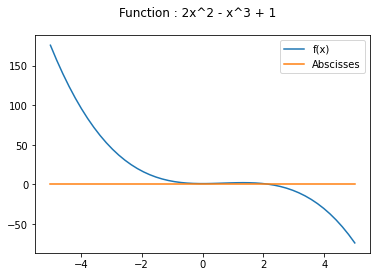

The solution is : x = 2.2055693


In [34]:
fig, ax = plt.subplots()
x_ = np.linspace(-5, 5)
y = 2*x_**2 - x_**3 + 1
zero = 0*x_
ax.plot(x_, y, label ='f(x)')
ax.plot(x_, zero, label = 'Abscisses')
plt.legend()  
fig.suptitle('Function : 2x^2 - x^3 + 1')
plt.show()

vec = [2*x**2 - x**3 + 1]
res = FirstModel(vec, 1, 3)
print(res)

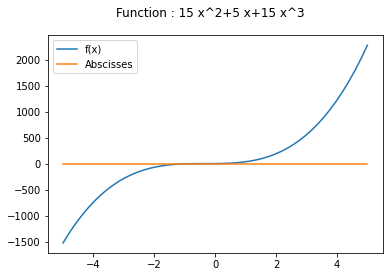

The solution is : x = 6.6137518e-09


In [35]:
fig, ax = plt.subplots()
x_ = np.linspace(-5, 5)
y = 15*x_**(2) + 5*x_+ 15*x_**(3)
zero = 0*x_
ax.plot(x_, y, label ='f(x)')
ax.plot(x_, zero, label = 'Abscisses')
plt.legend()  
fig.suptitle('Function : 15 x^2+5 x+15 x^3')
plt.show()

vec = [15*x**(2) + 5*x + 15*x**(3)]
res = FirstModel(vec, 1, 3)
print(res)

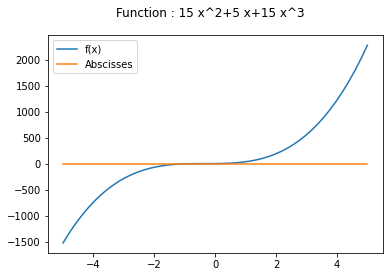

NameError: name 'symbols' is not defined

In [40]:
fig, ax = plt.subplots()
x_ = np.linspace(-5, 5)
y = 15*x_**(2) + 5*x_+ 15*x_**(3)
zero = 0*x_
ax.plot(x_, y, label ='f(x)')
ax.plot(x_, zero, label = 'Abscisses')
plt.legend()  
fig.suptitle('Function : 15 x^2+5 x+15 x^3')
plt.show()

import sympy as sp
x = symbols("x")
expr = cos(x)
vec = [expr - x**3]
res = FirstModel(vec, 1, 3)
print(res)